# Initialisation

## Installing necessary components

In [1]:
!pip install transformers
!pip install datasets
!pip install osfclient
!pip install sentencepiece
# !git clone https://github.com/yjthay/DZ_GenresAndStyle.git
import csv
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import itertools
from sklearn.preprocessing import MultiLabelBinarizer

from datasets import load_dataset, list_datasets
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, DistilBertModel, DistilBertTokenizer,RobertaModel, RobertaTokenizer

!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/utils.py
!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/data/ekman_mapping.json -P ./data/
!wget https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/data/sentiment_mapping.json -P ./data/
# %cd /content/DZ_GenresAndStyle/

     |████████████████████████████████| 2.6 MB 6.5 MB/s 
     |████████████████████████████████| 3.3 MB 46.9 MB/s 
     |████████████████████████████████| 895 kB 53.4 MB/s 
     |████████████████████████████████| 636 kB 37.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 264 kB 8.4 MB/s 
     |████████████████████████████████| 243 kB 64.2 MB/s 
     |████████████████████████████████| 118 kB 74.4 MB/s 
     |████████████████████████████████| 1.2 MB 7.0 MB/s 
--2021-08-28 17:33:48--  https://raw.githubusercontent.com/yjthay/DZ_GenresAndStyle/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23525 (23K

In [2]:
!osf -p cku2b clone /content/

0files [00:00, ?files/s]
  0% 0.00/892M [00:00<?, ?bytes/s]
  0% 4.21M/892M [00:00<01:08, 13.0Mbytes/s]
  1% 8.40M/892M [00:01<02:06, 6.97Mbytes/s]
  3% 25.2M/892M [00:01<00:34, 25.1Mbytes/s]
  5% 42.2M/892M [00:01<00:18, 45.6Mbytes/s]
  7% 58.7M/892M [00:01<00:13, 62.6Mbytes/s]
  8% 75.5M/892M [00:01<00:09, 81.7Mbytes/s]
 10% 92.3M/892M [00:01<00:08, 94.1Mbytes/s]
 12% 109M/892M [00:01<00:07, 108Mbytes/s]  
 14% 126M/892M [00:01<00:06, 123Mbytes/s]
 16% 143M/892M [00:02<00:05, 128Mbytes/s]
 18% 159M/892M [00:02<00:05, 130Mbytes/s]
 20% 176M/892M [00:02<00:05, 135Mbytes/s]
 21% 191M/892M [00:02<00:05, 117Mbytes/s]
 24% 218M/892M [00:02<00:05, 132Mbytes/s]
 26% 235M/892M [00:02<00:05, 130Mbytes/s]
 28% 252M/892M [00:02<00:04, 134Mbytes/s]
 30% 268M/892M [00:04<00:18, 34.1Mbytes/s]
 31% 278M/892M [00:04<00:16, 37.9Mbytes/s]
 34% 302M/892M [00:04<00:10, 56.8Mbytes/s]
 35% 315M/892M [00:04<00:08, 64.8Mbytes/s]
 37% 328M/892M [00:04<00:07, 72.6Mbytes/s]
 39% 344M/892M [00:04<00:06, 85.2Mbyt

## Utility functions

In [3]:
from utils import *

Downloading:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

No config specified, defaulting to: go_emotions/simplified


Downloading:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/203k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/201k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (/root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)
No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (/root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

## Load full dataset

In [4]:
data = load_dataset('go_emotions')

No config specified, defaulting to: go_emotions/simplified
Reusing dataset go_emotions (/root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


## Analysis of labels

Total number of train, test and validation samples is 54263
Number of samples with 1 label/labels = 45446
Number of samples with 2 label/labels = 8124
Number of samples with 3 label/labels = 655
Number of samples with 4 label/labels = 37
Number of samples with 5 label/labels = 1


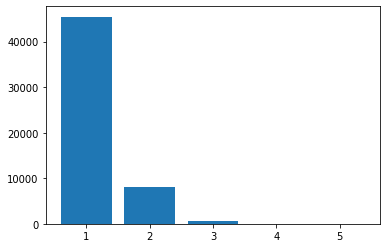

In [5]:
data_labels_all = data['train']['labels'] + data['test']['labels'] + data['validation']['labels']
print("Total number of train, test and validation samples is {}".format(len(data_labels_all)))
_labels, _counts = np.unique([len(y) for y in data_labels_all], return_counts=True)
plt.bar(_labels, _counts, align='center')
plt.gca().set_xticks(_labels)
[print("Number of samples with {} label/labels = {}".format(i, j)) for i, j in zip(_labels, _counts)]
plt.show()

In [6]:
label_mapping = {}
label_names = data['train'].features['labels'].__dict__['feature'].names
for i, emotion in enumerate(label_names):
    label_mapping[i] = emotion.strip()
label_mapping

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

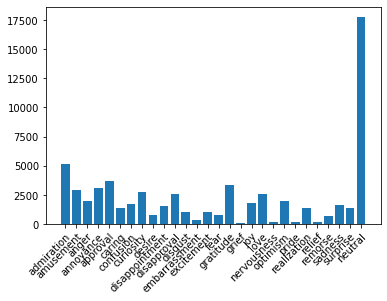

In [7]:
all_labels = list(itertools.chain.from_iterable(data_labels_all))
_labels, _counts = np.unique(all_labels, return_counts=True)
fig, ax = plt.subplots()
fig = plt.bar(_labels, _counts, align='center')
plt.gca().set_xticks(_labels)
ax.set_xticklabels(label_names, horizontalalignment='right', wrap=True, rotation=45)
plt.show()

## Analysis of text

In [8]:
data_text_all = data['train']['text'] + data['test']['text'] + data['validation']['text']
BERT_TYPE_LIST = ['bert-base-cased', 'roberta-base']
bert_type = 'bert-base-cased'
[print(i) for i in data_text_all[:5]]
tokenizer = BertTokenizer.from_pretrained(bert_type)
tokens = tokenizer(data_text_all, padding='max_length', truncation=True, max_length=60, return_tensors="pt")
# tokens = tokenizer(data_text_all, padding=True, return_tensors="pt")

My favourite food is anything I didn't have to cook myself.
Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead
WHY THE FUCK IS BAYLESS ISOING
To make her feel threatened
Dirty Southern Wankers


Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

(array([ 5695., 11332., 12211.,  9291.,  8948.,  5198.,  1143.,   317.,
           77.,    51.]),
 array([ 3. ,  8.7, 14.4, 20.1, 25.8, 31.5, 37.2, 42.9, 48.6, 54.3, 60. ]),
 <a list of 10 Patch objects>)

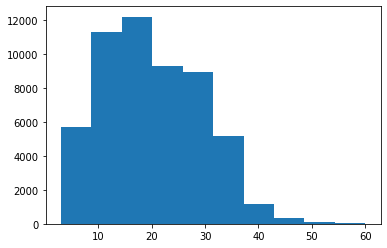

In [9]:
from scipy import stats

max_len = 0
total = 0
a = [sum(i != 0).item() for i in tokens['input_ids']]
plt.hist(a)

In [10]:
for input, att in zip(tokens['input_ids'], tokens['attention_mask']):
    if sum(att) >= 60:
        print(sum(att))
        print(tokenizer.decode(input))

tensor(60)
[CLS] If you ’ re concerned about [ NAME ], then you must still be concerned about [ NAME ]. WAR over last 2 seasons : [ NAME ] : 4. 8, 3. 1 [ NAME ] : 4. 0, 3. 6 [SEP]
tensor(60)
[CLS] YO HERE'S DYNASTY WITH ANOTHER EX CLU SIVE LOOK AT THE ALL NEW MORTAL KOMBAAAAAT COVER ART ( 5 Minutes later )... [SEP]
tensor(60)
[CLS] I THOUGHT IT WAS JUST ONE GUY AND I WAS SERIOUSLY HERE TO POST ABOUT YOUTUBE'S COMMENT ALGORITHM BUT * * OH Y [SEP]
tensor(60)
[CLS] good start [ NAME ]. MORE! MORE TRADES! GET WHAT YOU CAN! SELL, SELL, SELL! # BurnItDown # NobodyIsSafe # ShapeUpO [SEP]
tensor(60)
[CLS] ackchyually, it's * r / woooosh ^ ^ ^ ^ ^ I'm ^ ^ ^ ^ ^ a ^ ^ ^ ^ ^ bot. ^ ^ ^ ^ ^ Complaints ^ ^ ^ ^ ^ should ^ ^ ^ ^ ^ be [SEP]
tensor(60)
[CLS] me : haha im an incel. rApE sHoUlD bE lEgAl! wOmEn ArE iNcApAbLe Of ThInKiNg greaseball who stares [SEP]
tensor(60)
[CLS] NO absolueltey wrong. WE MUST PRIORITIZE GETTING CORPORATE MONEY OUT OF POLITICS OR WE WILL NEVER BE ABLE TO SOLVE AN [SEP]
te

# Training

In [11]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

pre_path='/content/drive/MyDrive/DeepZen/'

Mounted at /content/drive


In [26]:

def train(model, train_dataset, val_dataset, epochs, lr, batch_size, show_progress=False, save_path=None):
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

    # Construct data loader from training and validation dataset
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    val_losses = []
    train_losses = []

    num_train = len(train_dataset)

    # Training
    for epoch in range(epochs):
        # backprop
        running_loss = 0.0
        inner_iter = 0
        pbar = tqdm(train_loader, position=0, leave=True)
        epoch_idx = int(epoch + 1)
        model.train()
        for input_id, attention_mask, y in pbar:
            pbar.set_description("Processing Epoch %d" % epoch_idx)

            outputs = model(input_id, attention_mask)
            optimizer.zero_grad()
            # print(outputs.type(),y.type())
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # calculate training loss
        train_loss = running_loss / len(train_loader)  # calculate validation loss

        with torch.no_grad():
            running_loss = 0.0
            for input_id_val, attention_mask_val, y_val in val_loader:
                outputs_val = model(input_id_val, attention_mask_val)
                running_loss += criterion(outputs_val, y_val).item()

        # calculate validation loss
        val_loss = running_loss / len(val_loader)  # calculate validation loss

        # print status
        if show_progress:
            print('\n Epoch = %d, Train loss = %.5f, Val loss = %.5f' % (epoch_idx, train_loss, val_loss))

        # append training and validation loss
        val_losses.append(val_loss)
        train_losses.append(train_loss)

        # save model at each epoch
        if save_path is not None:
            save_path_name = save_path + 'epoch_{}_{:.5f}.pt'.format(epoch_idx, val_loss)
            torch.save(model, save_path_name)
        pbar.reset()

    return train_losses, val_losses


## Training model for various BERTs

In [27]:
# BERT_TYPE_LIST = ['bert-base-cased','bert-base-uncased','distilbert-base-cased', 'roberta-large','roberta-base','distilroberta-base']
DEVICE = 'cuda'  # cuda or cpu
pre_path='/content/drive/MyDrive/DeepZen/'
model_save_path = pre_path+'model/'
save_path = pre_path+'model/epochs/'
max_length=64
for i in range(10):
    for BERT_TYPE in ['distilbert-base-cased', 'roberta-base','bert-base-cased']:
        print(BERT_TYPE)
        train_dataset = EmotionsDataset(data['train'], device=DEVICE, bert_type=BERT_TYPE, max_length=max_length)
        val_dataset = EmotionsDataset(data['validation'], device=DEVICE, bert_type=BERT_TYPE, max_length=max_length)
        model = BERT_Model((max_length * 768, 512, 28), BERT_TYPE, device=DEVICE) #(input dim, hidden dim, output dim)
        train_losses, val_losses = train(model, train_dataset, val_dataset, epochs=4, lr=5e-5, batch_size=16, show_progress=True, save_path=save_path+BERT_TYPE+"/")

distilbert-base-cased


Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Processing Epoch 1: 100%|██████████| 2714/2714 [05:24<00:00,  8.36it/s]



 Epoch = 1, Train loss = 0.09662, Val loss = 0.08771


Processing Epoch 2: 100%|██████████| 2714/2714 [05:34<00:00,  8.12it/s]



 Epoch = 2, Train loss = 0.07728, Val loss = 0.08707


Processing Epoch 3: 100%|██████████| 2714/2714 [05:34<00:00,  8.11it/s]



 Epoch = 3, Train loss = 0.05894, Val loss = 0.09565


Processing Epoch 4: 100%|██████████| 2714/2714 [05:36<00:00,  8.07it/s]



 Epoch = 4, Train loss = 0.03808, Val loss = 0.11098
roberta-base


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Processing Epoch 1: 100%|██████████| 2714/2714 [10:48<00:00,  4.18it/s]



 Epoch = 1, Train loss = 0.09896, Val loss = 0.08974


Processing Epoch 2: 100%|██████████| 2714/2714 [10:49<00:00,  4.18it/s]



 Epoch = 2, Train loss = 0.08380, Val loss = 0.08667


Processing Epoch 3: 100%|██████████| 2714/2714 [10:40<00:00,  4.24it/s]



 Epoch = 3, Train loss = 0.07629, Val loss = 0.08650


Processing Epoch 4: 100%|██████████| 2714/2714 [10:38<00:00,  4.25it/s]



 Epoch = 4, Train loss = 0.06969, Val loss = 0.08756
bert-base-cased


Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Processing Epoch 1: 100%|██████████| 2714/2714 [10:16<00:00,  4.41it/s]



 Epoch = 1, Train loss = 0.09712, Val loss = 0.08617


Processing Epoch 2: 100%|██████████| 2714/2714 [10:20<00:00,  4.38it/s]



 Epoch = 2, Train loss = 0.07725, Val loss = 0.08618


Processing Epoch 3: 100%|██████████| 2714/2714 [10:20<00:00,  4.37it/s]



 Epoch = 3, Train loss = 0.05974, Val loss = 0.09194


Processing Epoch 4: 100%|██████████| 2714/2714 [10:20<00:00,  4.37it/s]



 Epoch = 4, Train loss = 0.04000, Val loss = 0.11113


In [38]:
!osf init
!osf list
!osf -p cku2b upload -r /content/drive/MyDrive/DeepZen/model/epochs /model/

Provide a username for the config file [current username: ucabyt3@ucl.ac.uk]:
ucabyt3@ucl.ac.uk
Provide a project for the config file [current project: DZ_GenresAndStyle]:
cku2b
Please input your password: 
osfstorage/model/epochs/t5/epoch_1_0.19940.pt
osfstorage/model/epochs/t5/epoch_5_0.48265.pt
osfstorage/model/epochs/t5/epoch_3_0.37037.pt
osfstorage/model/epochs/t5/epoch_2_0.28261.pt
osfstorage/model/epochs/t5/epoch_4_0.43517.pt
osfstorage/model/epochs/bert-base-cased/epoch_4_0.14170.pt
osfstorage/model/epochs/bert-base-cased/epoch_5_0.15400.pt
osfstorage/model/epochs/bert-base-cased/epoch_3_0.10937.pt
osfstorage/model/epochs/bert-base-cased/epoch_2_0.08855.pt
osfstorage/model/epochs/bert-base-cased/epoch_1_0.08710.pt
osfstorage/model/epochs/roberta-base/epoch_4_0.10514.pt
osfstorage/model/epochs/roberta-base/epoch_3_0.09031.pt
osfstorage/model/epochs/roberta-base/epoch_2_0.08543.pt
osfstorage/model/epochs/roberta-base/epoch_1_0.08583.pt
osfstorage/model/epochs/roberta-base/epoch_5

Please input your password: 


## T5 Training

In [ ]:
data = load_dataset('go_emotions')
train_data = T5Dataset(data['train'])
val_data = T5Dataset(data['validation'])

DEVICE = 'cuda'  # cuda or cpu
max_length = config.TGT_MAX_LENGTH
model_save_path = pre_path + 'model/'
save_path = pre_path + 'model/epochs/t5/'

model = T5Model().to(DEVICE)
train_losses, val_losses, y_pred, y_true = train_T5(model, train_data, val_data, epochs=5, lr=5e-5, batch_size=16, show_progress=True, save_path=save_path)


In [ ]:
# Copy Google Drive folders into osf.io

!osf init
!osf list
!osf -p cku2b upload -r /content/drive/MyDrive/DeepZen/model/epochs /model/

# Analysis of results

Loading the best model based on the validation error

In [14]:
model_names = ['distilbert-base-cased', 'roberta-base','bert-base-cased','t5']
DEVICE = 'cuda' #'cpu'
pre_path = 'osfstorage/'
tuned_models = {}
for name in model_names:
    model_file_path = best_model_filename(pre_path+'model/epochs/'+name+'/')
    tuned_models[name] = torch.load(model_file_path, map_location=torch.device(DEVICE))
    print(model_file_path)
print(tuned_models.keys())

osfstorage/model/epochs/distilbert-base-cased/epoch_1_0.08635.pt
osfstorage/model/epochs/roberta-base/epoch_2_0.08543.pt
osfstorage/model/epochs/bert-base-cased/epoch_1_0.08710.pt
osfstorage/model/epochs/t5/epoch_1_0.19940.pt
dict_keys(['distilbert-base-cased', 'roberta-base', 'bert-base-cased', 't5'])


In [25]:
def train(model, train_dataset, val_dataset, epochs, lr, batch_size, show_progress=False, save_path=None):
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

    # Construct data loader from training and validation dataset
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    val_losses = []
    train_losses = []

    num_train = len(train_dataset)

    # Training
    for epoch in range(epochs):
        # backprop
        running_loss = 0.0
        inner_iter = 0
        pbar = tqdm(train_loader, position=0, leave=True)
        epoch_idx = int(epoch + 1)
        model.train()
        for input_id, attention_mask, y in pbar:
            pbar.set_description("Processing Epoch %d" % epoch_idx)

            outputs = model(input_id, attention_mask)
            optimizer.zero_grad()
            # print(outputs.type(),y.type())
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # calculate training loss
        train_loss = running_loss / len(train_loader)  # calculate validation loss

        # model.eval()
        with torch.no_grad():
            running_loss = 0.0
            for input_id_val, attention_mask_val, y_val in val_loader:
                outputs_val = model(input_id_val, attention_mask_val)
                running_loss += criterion(outputs_val, y_val).item()

        # calculate validation loss
        val_loss = running_loss / len(val_loader)  # calculate validation loss

        # print status
        if show_progress:
            print('\n Epoch = %d, Train loss = %.5f, Val loss = %.5f' % (epoch_idx, train_loss, val_loss))

        # append training and validation loss
        val_losses.append(val_loss)
        train_losses.append(train_loss)

        # save model at each epoch
        if save_path is not None:
            save_path_name = save_path + 'epoch_{}_{:.5f}.pt'.format(epoch_idx, val_loss)
            torch.save(model, save_path_name)
        pbar.reset()

    return train_losses, val_losses

## F1 Score of Testing Set

In [28]:
model_names = ['distilbert-base-cased', 'roberta-base','bert-base-cased']
test_data = EmotionsDataset(data['test'], max_length=64, device=DEVICE)
threshold = 0.3

for name in model_names:
    y_pred_test = predict(torch.load('/content/osfstorage/model/epochs/roberta-base/epoch_1_0.08962.pt', map_location=torch.device(DEVICE)), test_data)
    # y_pred_test = predict(tuned_models[name], test_data)
    y_true_test =  test_data.labels.cpu().numpy()
    y_pred_test = (y_pred_test>=threshold) * np.ones(y_pred_test.shape)
    f1 = f1_score(y_true_test, y_pred_test, average='macro')
    print("Testing - Name: {} yields an f1 score of {}".format(name, f1))

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Testing - Name: distilbert-base-cased yields an f1 score of 0.020733498582514137
Testing - Name: roberta-base yields an f1 score of 0.020733498582514137


KeyboardInterrupt: ignored

### tSNE Plot of GoEmotions - Test

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test[:,:-1], label_mapping)

### tSNE Plot of Ekman - Test

In [ ]:
y_true_test_ekman = convert_to_ekman(reverse_one_hot(y_true_test))
y_true_test_ekman = label_multi_one_hot(y_true_test_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Test

In [ ]:
y_true_test_sentiment = convert_to_sentiment(reverse_one_hot(y_true_test))
y_true_test_sentiment = label_multi_one_hot(y_true_test_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_test[:,:-1]), y_true_test_sentiment[:,:-1], sentiment_label_mapping)

## F1 Score of Validation Set

In [ ]:
val_data = EmotionsDataset(data['validation'], max_length=64, device=DEVICE)
y_pred_val = predict(model, val_data)
y_true_val =  val_data.labels.cpu().numpy()

for i in range(1,10):
    threshold = i/10.
    y_pred = (y_pred_val>=threshold) * np.ones(y_pred_val.shape)
    f1 = f1_score(y_true_val, y_pred, average='samples')
    print("Validation - Sigmoid Threshold of {} yields an f1 score of {}".format(threshold, f1))

### tSNE Plot of GoEmotions - Validation

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val[:,:-1], label_mapping)

### tSNE Plot of Ekman - Validation

In [ ]:
y_true_val_ekman = convert_to_ekman(reverse_one_hot(y_true_val))
y_true_val_ekman = label_multi_one_hot(y_true_val_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Validation

In [ ]:
y_true_val_sentiment = convert_to_sentiment(reverse_one_hot(y_true_val))
y_true_val_sentiment = label_multi_one_hot(y_true_val_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_val[:,:-1]), y_true_val_sentiment[:,:-1], sentiment_label_mapping)

## F1 Score of Training Set

In [ ]:
train_data = EmotionsDataset(data['train'], max_length=64, device=DEVICE)
y_pred_train = predict(model, train_data)
y_true_train =  train_data.labels.cpu().numpy()

for i in range(1,10):
    threshold = i/10.
    y_pred = (y_pred_train>=threshold) * np.ones(y_pred_train.shape)
    f1 = f1_score(y_true_train, y_pred, average='samples')
    print("Training - Sigmoid Threshold of {} yields an f1 score of {}".format(threshold, f1))

### tSNE Plot of GoEmotions - Training

In [ ]:
# Ignoring neutral
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train[:,:-1], label_mapping)

### tSNE Plot of Ekman - Training

In [ ]:
y_true_train_ekman = convert_to_ekman(reverse_one_hot(y_true_train))
y_true_train_ekman = label_multi_one_hot(y_true_train_ekman).numpy()
ekman_fname='data/ekman_mapping.json'
with open(ekman_fname) as f:
    ekman_mapping = json.load(f)
ekman_label_mapping = {}
for idx, key in enumerate(ekman_mapping):
    ekman_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train_ekman[:,:-1], ekman_label_mapping)

### tSNE Plot of Sentiment - Training

In [ ]:
y_true_train_sentiment = convert_to_sentiment(reverse_one_hot(y_true_train))
y_true_train_sentiment = label_multi_one_hot(y_true_train_sentiment).numpy()
sentiment_fname='data/sentiment_mapping.json'
with open(sentiment_fname) as f:
    sentiment_mapping = json.load(f)
sentiment_label_mapping = {}
for idx, key in enumerate(sentiment_mapping):
    sentiment_label_mapping[idx] = key
visualize_scatter(gen_tsne_values(y_pred_train[:,:-1]), y_true_train_sentiment[:,:-1], sentiment_label_mapping, figsize=(20,20))



In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

a = tokenizer.encode("translate English to French: My favourite food is anything I didn't have to cook myself",return_tensors="pt")
# a = tokenizer.encode("translate English to German: My favourite food is anything I didn't have to cook myself",return_tensors="pt")
print(a)
b = model.generate(a)
print(b)
tokenizer.decode(b[0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

threshold = 0.3
y_pred = (y_pred_test>=threshold) * np.ones(y_pred_test.shape)
results = {}
label_mapping = mapping()
for i in range(28):
    emotion = label_mapping[i]
    emotion_true = y_true_test[:, i]
    emotion_pred = y_pred[:, i]
    # results[emotion + "_accuracy"] = accuracy_score(emotion_true, emotion_pred)
    results[emotion + "_precision"], results[emotion + "_recall"], results[emotion + "_f1"], _ = precision_recall_fscore_support(emotion_true, emotion_pred, average="binary")

# test = 0
# count = 0
for i in results:
    print(i,results[i])